In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

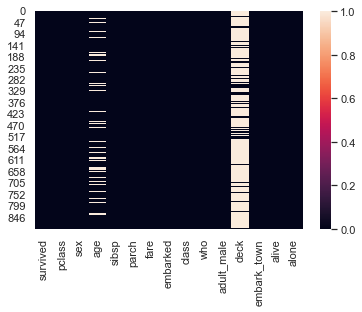

In [5]:
sns.heatmap(titanic.isna())

In [6]:
titanic.drop('deck',axis=1,inplace=True)

<AxesSubplot:>

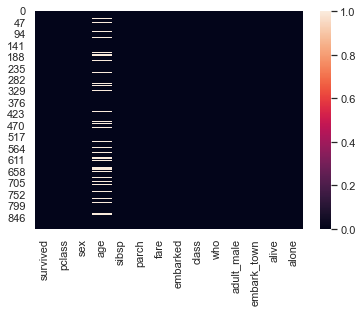

In [7]:
sns.heatmap(titanic.isna())

<AxesSubplot:>

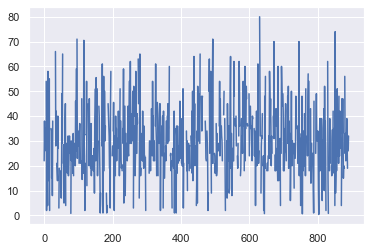

In [8]:
titanic['age'].plot()

In [9]:
titanic['age'].mean()

29.69911764705882

In [10]:
titanic[titanic['age']>70]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,Southampton,no,True


In [11]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [12]:
titanic['age_mean']=titanic.groupby(['survived','pclass','sex'])['age'].transform('mean')
titanic['age_mean']=titanic['age_mean'].apply(np.round)

In [13]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,27.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,35.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,19.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,33.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,35.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False,24.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,36.0


In [14]:
titanic['age']=titanic['age'].fillna(titanic['age_mean'])

In [15]:
titanic[titanic['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True,35.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True,35.0


In [16]:
titanic[titanic['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True,35.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True,35.0


In [17]:
titanic.dropna(inplace=True)

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
 14  age_mean     889 non-null    float64 
dtypes: bool(2), category(1), float64(3), int64(4), object(5)
memory usage: 93.0+ KB


<AxesSubplot:>

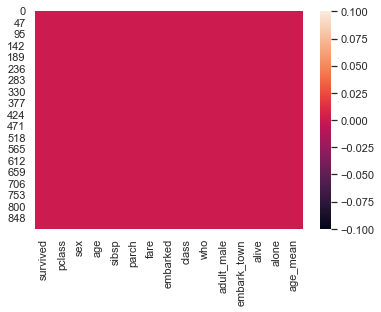

In [19]:
sns.heatmap(titanic.isna())

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

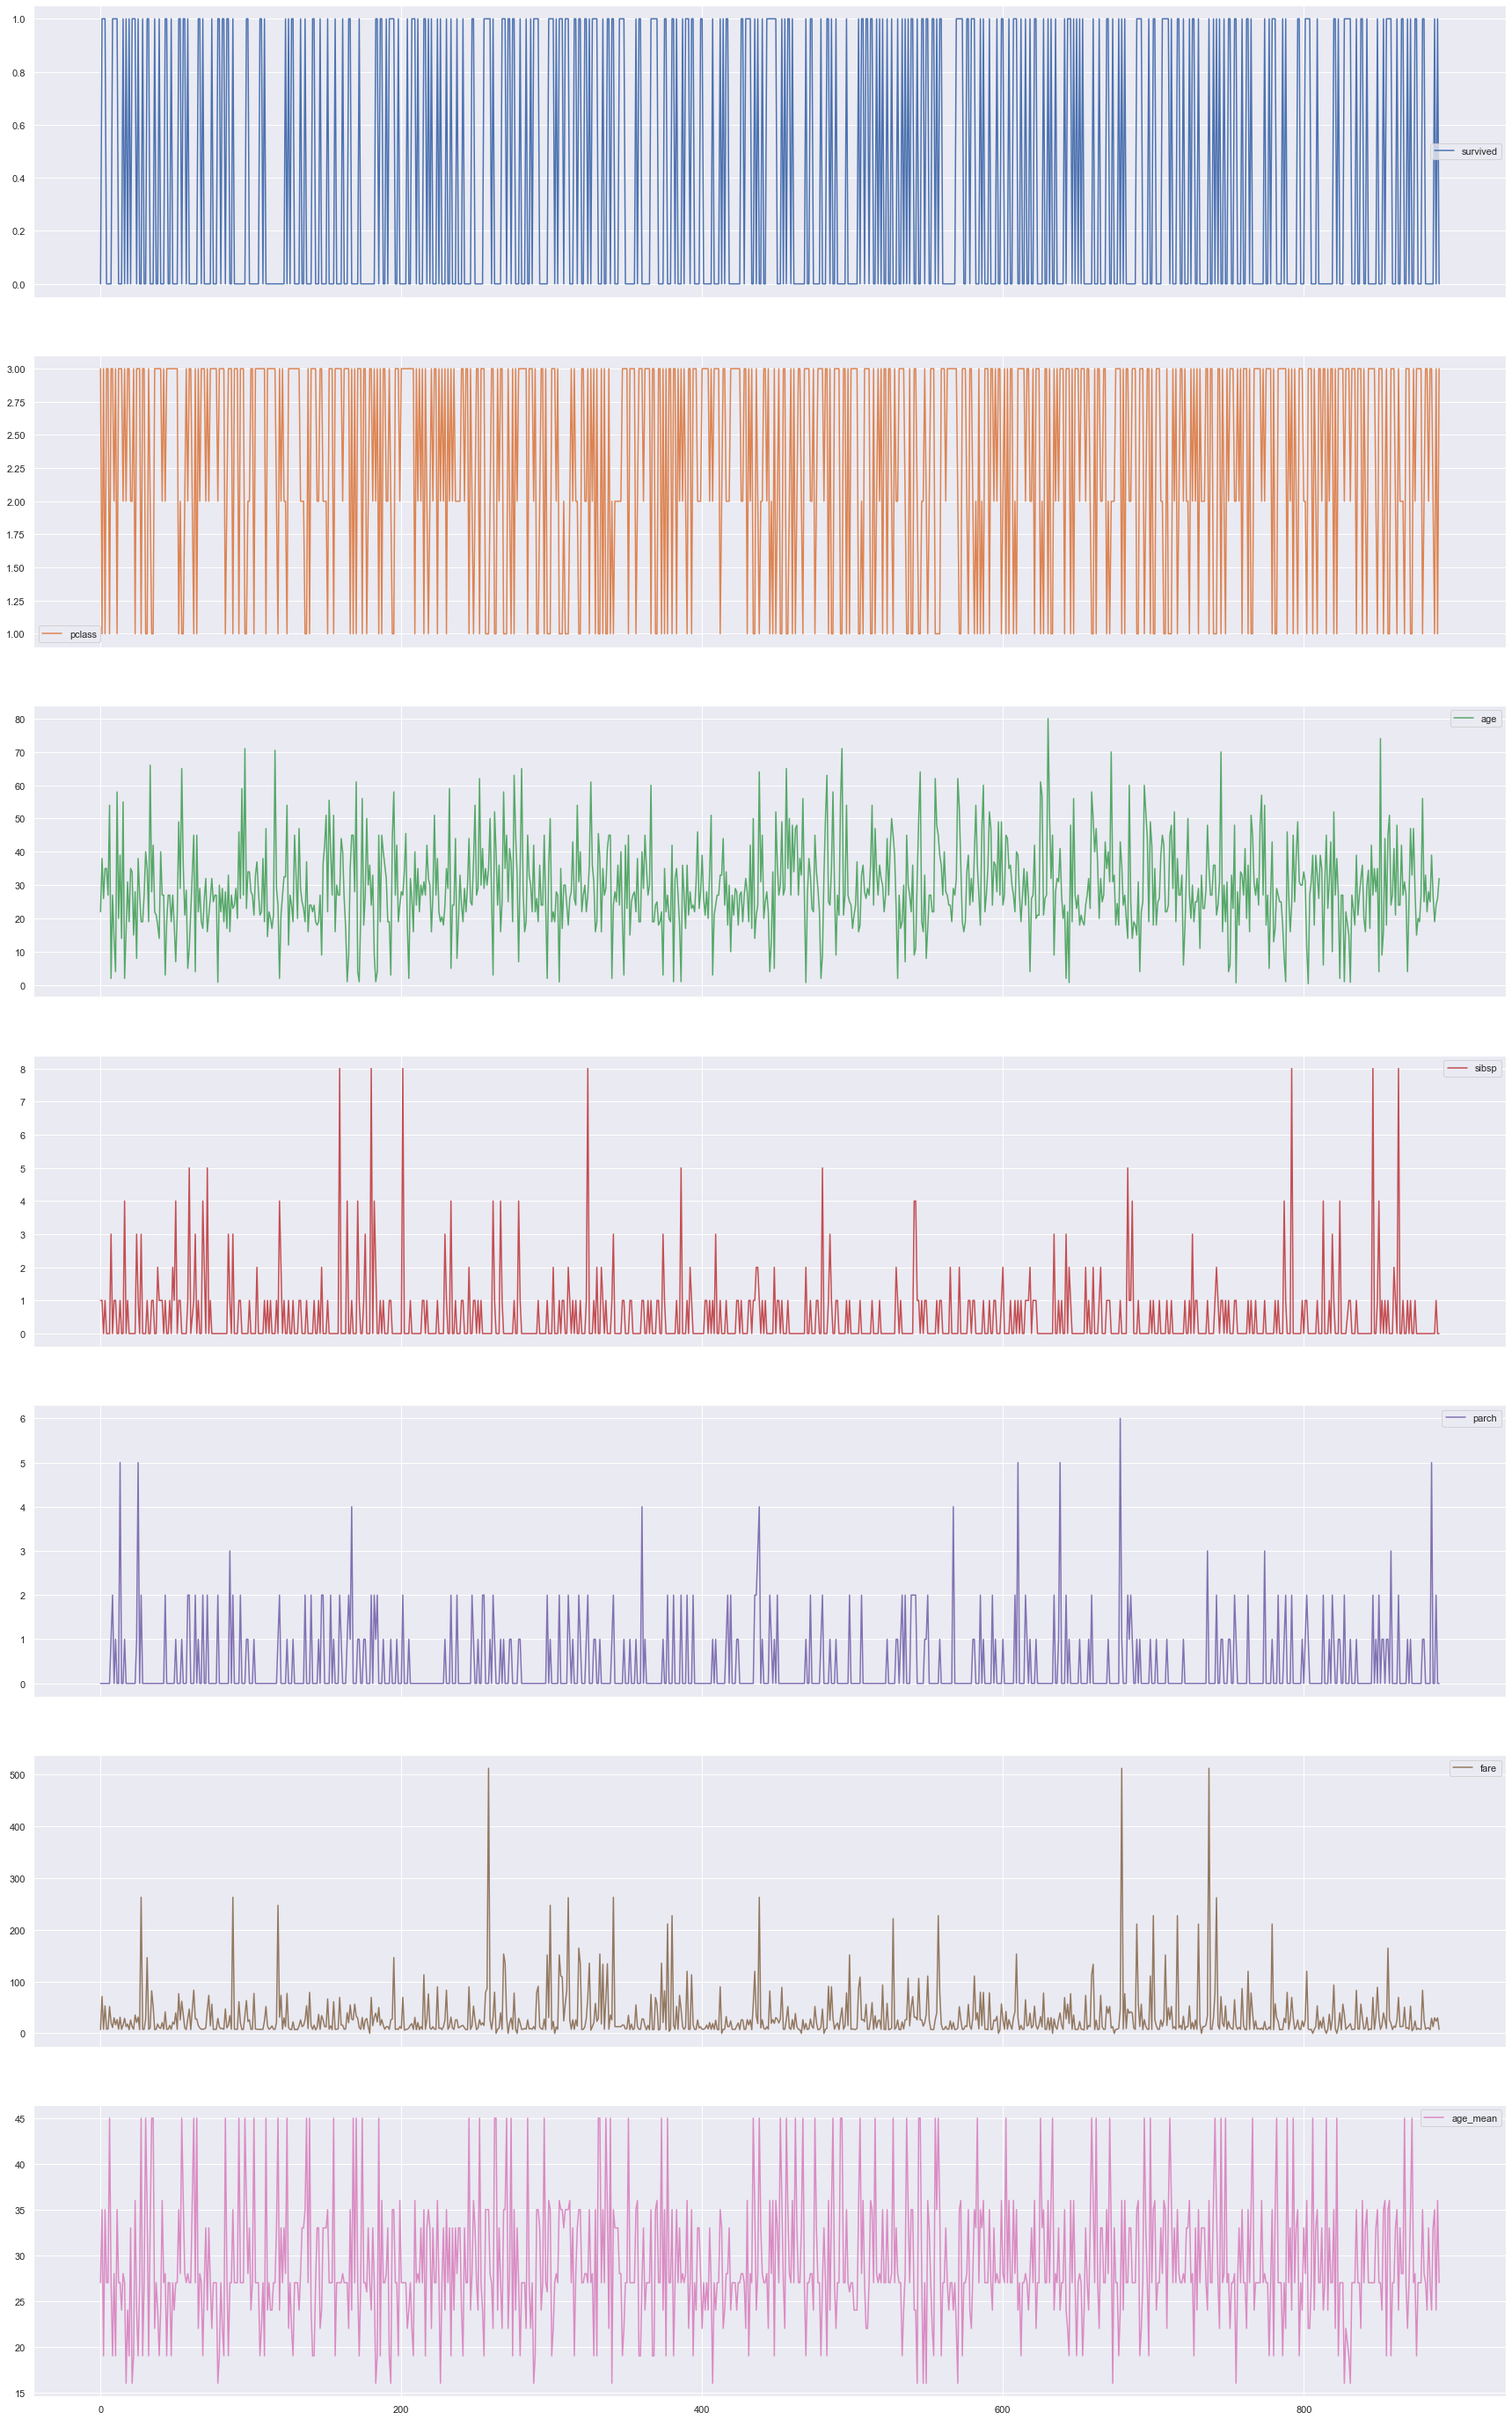

In [20]:
titanic.plot(subplots=True,figsize=(30,50))

In [21]:
titanic[titanic.fare>300]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_mean
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True,35.0
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,Cherbourg,yes,False,36.0
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,Cherbourg,yes,True,36.0


In [22]:
titanic.parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [23]:
titanic.sibsp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

<AxesSubplot:xlabel='sibsp,survived'>

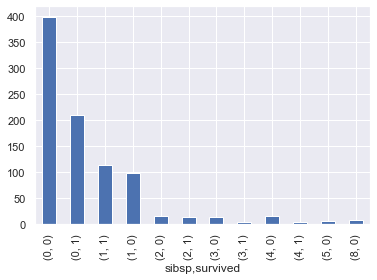

In [24]:
titanic.groupby('sibsp')['survived'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='parch,survived'>

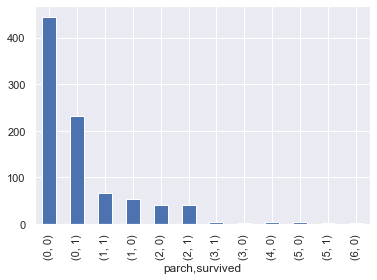

In [25]:
titanic.groupby('parch')['survived'].value_counts().plot(kind='bar')


In [26]:
titanic.drop_duplicates(inplace=True)
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_mean
678,0,3,female,43.0,1,6,46.9000,S,Third,woman,False,Southampton,no,False,24.0
440,1,2,female,45.0,1,1,26.2500,S,Second,woman,False,Southampton,yes,False,28.0
411,0,3,male,27.0,0,0,6.8583,Q,Third,man,True,Queenstown,no,True,27.0
131,0,3,male,20.0,0,0,7.0500,S,Third,man,True,Southampton,no,True,27.0
648,0,3,male,27.0,0,0,7.5500,S,Third,man,True,Southampton,no,True,27.0
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True,35.0
507,1,1,male,36.0,0,0,26.5500,S,First,man,True,Southampton,yes,True,36.0
159,0,3,male,27.0,8,2,69.5500,S,Third,man,True,Southampton,no,False,27.0
625,0,1,male,61.0,0,0,32.3208,S,First,man,True,Southampton,no,True,45.0
219,0,2,male,30.0,0,0,10.5000,S,Second,man,True,Southampton,no,True,33.0


In [27]:
titanic.drop(['adult_male','embark_town','age_mean','who','class','alive'],axis=1,inplace=True)

In [28]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
873,0,3,male,47.0,0,0,9.0000,S,True
717,1,2,female,27.0,0,0,10.5000,S,True
474,0,3,female,22.0,0,0,9.8375,S,True
329,1,1,female,16.0,0,1,57.9792,C,False
675,0,3,male,18.0,0,0,7.7750,S,True
360,0,3,male,40.0,1,4,27.9000,S,False
338,1,3,male,45.0,0,0,8.0500,S,True
7,0,3,male,2.0,3,1,21.0750,S,False
449,1,1,male,52.0,0,0,30.5000,S,True
681,1,1,male,27.0,0,0,76.7292,C,True


In [29]:
titanic.pivot_table(index=['survived','alone'],values=['age','fare'])

age       fare
survived alone                      
0        False  27.157576  38.811972
         True   32.864261  15.689716
1        False  25.711744  59.697070
         True   30.455479  38.868494

In [30]:
titanic.pivot_table(index=['alone'],values=['survived'],aggfunc={'survived':'value_counts'})

survived
alone survived          
False 1              172
      0              165
True  0              291
      1              146

<AxesSubplot:xlabel='alone,survived'>

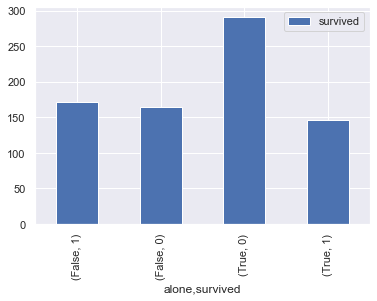

In [31]:
titanic.pivot_table(index=['alone'],values=['survived'],aggfunc={'survived':'value_counts'}).plot(kind='bar')

In [32]:
titanic.pivot_table(index=['alone'],values=['survived'],aggfunc='sum')

,survived
alone,
False,172
True,146


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '(Q, male, 1, 0)'),
  Text(1, 0, '(Q, male, 2, 0)'),
  Text(2, 0, '(Q, female, 1, 1)'),
  Text(3, 0, '(C, female, 1, 0)'),
  Text(4, 0, '(Q, female, 2, 1)'),
  Text(5, 0, '(S, female, 1, 0)'),
  Text(6, 0, '(C, male, 2, 1)'),
  Text(7, 0, '(Q, male, 3, 1)'),
  Text(8, 0, '(S, female, 2, 0)'),
  Text(9, 0, '(C, female, 2, 1)'),
  Text(10, 0, '(C, female, 3, 0)'),
  Text(11, 0, '(C, male, 2, 0)'),
  Text(12, 0, '(C, male, 3, 1)'),
  Text(13, 0, '(Q, female, 3, 0)'),
  Text(14, 0, '(Q, female, 3, 1)'),
  Text(15, 0, '(C, female, 3, 1)'),
  Text(16, 0, '(S, male, 2, 1)'),
  Text(17, 0, '(C, male, 1, 1)'),
  Text(18, 0, '(C, male, 3, 0)'),
  Text(19, 0, '(C, male, 1, 0)'),
  Text(20, 0, '(Q, male, 3, 0)'),
  Text(21, 0, '(S, male, 1, 1)'),
  Text(22, 0, '(S, female, 3, 1)'),
  Text(23, 0, '(S, male, 3, 1)'),
  Text(24, 0, '(C, female, 1, 

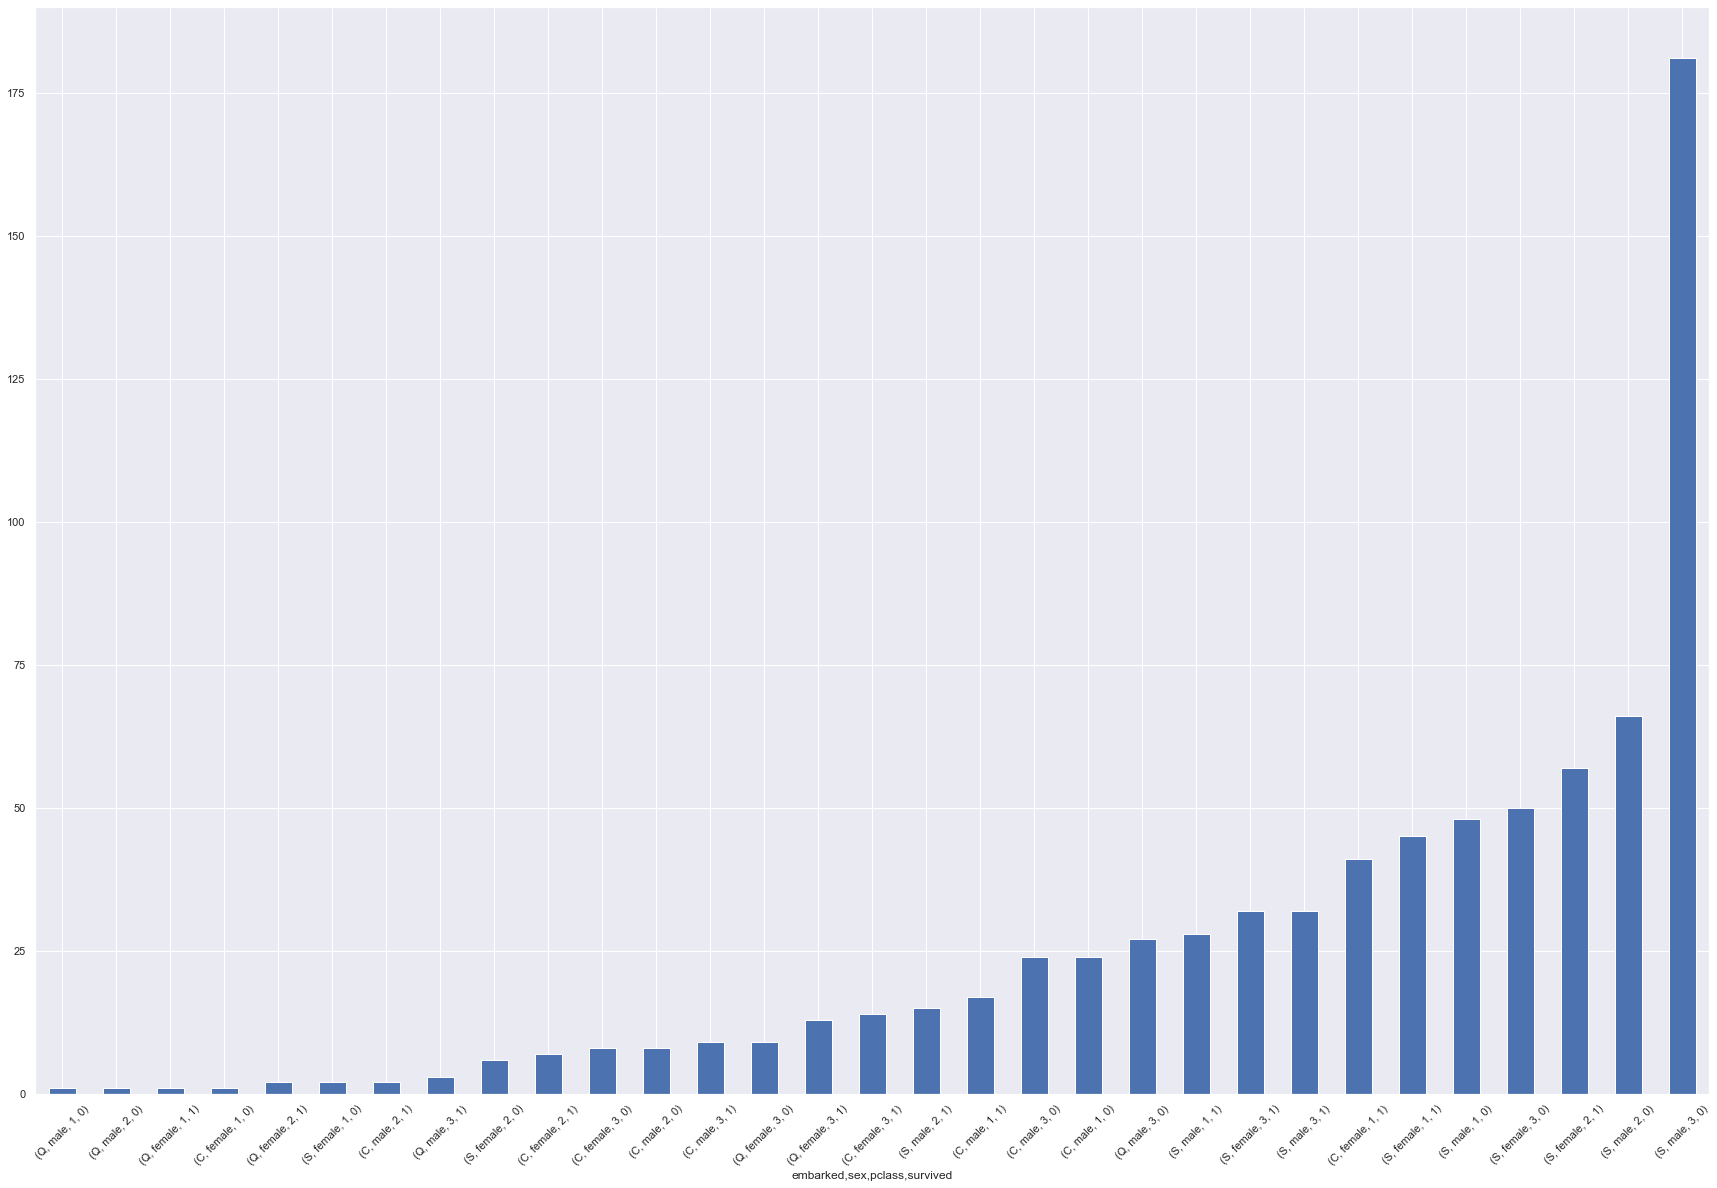

In [33]:
titanic.groupby(['embarked','sex','pclass'])['survived'].value_counts().sort_values().plot(kind='bar',figsize=(30,20))
plt.xticks(rotation=45)

In [34]:
h_d=titanic.groupby(['embarked','sex','pclass','survived']).get_group(('S','male',3,0))
h_d

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
7,0,3,male,2.0,3,1,21.0750,S,False
12,0,3,male,20.0,0,0,8.0500,S,True
13,0,3,male,39.0,1,5,31.2750,S,False
...,...,...,...,...,...,...,...,...,...
860,0,3,male,41.0,2,0,14.1083,S,False
868,0,3,male,27.0,0,0,9.5000,S,True
873,0,3,male,47.0,0,0,9.0000,S,True
876,0,3,male,20.0,0,0,9.8458,S,True


In [35]:
h_d.describe()

,survived,pclass,age,sibsp,parch,fare
count,181.0,181.0,181.000000,181.000000,181.000000,181.000000
mean,0.0,3.0,27.342541,0.580110,0.281768,12.960425
std,0.0,0.0,11.421292,1.291185,0.740232,11.149407
min,0.0,3.0,1.000000,0.000000,0.000000,0.000000
25%,0.0,3.0,20.000000,0.000000,0.000000,7.775000
50%,0.0,3.0,26.000000,0.000000,0.000000,8.050000
75%,0.0,3.0,33.000000,1.000000,0.000000,14.500000
max,0.0,3.0,74.000000,8.000000,5.000000,69.550000


In [37]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,0.410853,2.250646,29.603902,0.528424,0.421189,34.770515
std,0.492307,0.852190,14.009481,0.990821,0.840973,52.393110
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,27.500000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.890600
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
titanic['ages_ranges'] =pd.cut(titanic['age'],bins=[0,10,18,30,45,65,100],labels=[1,2 ,3 ,4,5,6])

In [ ]:
'''

titanic['ages_ranges'] = pd.cut(titanic['age'], bins=[0,10,18,30,45,65,100],
                                labels=['Child', 'Teenager', 'Adult', 'Youth', 'MiddleAged', 'Senior'])
titanic

'''

In [42]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,ages_ranges
685,0,2,male,25.0,1,2,41.5792,C,False,3
430,1,1,male,28.0,0,0,26.5500,S,True,3
31,1,1,female,35.0,1,0,146.5208,C,False,4
187,1,1,male,45.0,0,0,26.5500,S,True,4
585,1,1,female,18.0,0,2,79.6500,S,False,2
874,1,2,female,28.0,1,0,24.0000,C,False,3
580,1,2,female,25.0,1,1,30.0000,S,False,3
278,0,3,male,7.0,4,1,29.1250,Q,False,1
812,0,2,male,35.0,0,0,10.5000,S,True,4
45,0,3,male,27.0,0,0,8.0500,S,True,3


In [94]:
t=titanic.groupby(['ages_ranges'])['survived'].value_counts().to_frame()
t

survived
ages_ranges survived          
1           1               37
            0               26
2           0               40
            1               34
3           0              202
            1              115
4           0              124
            1               96
5           0               57
            1               35
6           0                7
            1                1

In [95]:
t.columns=['count_survived_or_non']

In [96]:
t

count_survived_or_non
ages_ranges survived                       
1           1                            37
            0                            26
2           0                            40
            1                            34
3           0                           202
            1                           115
4           0                           124
            1                            96
5           0                            57
            1                            35
6           0                             7
            1                             1

<AxesSubplot:xlabel='ages_ranges,survived'>

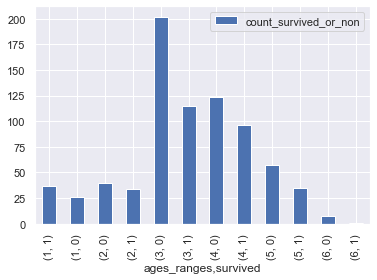

In [97]:
t.plot(kind='bar')

In [98]:
t.reset_index(inplace=True)

In [99]:
t

,ages_ranges,survived,count_survived_or_non
0,1,1,37
1,1,0,26
2,2,0,40
3,2,1,34
4,3,0,202
5,3,1,115
6,4,0,124
7,4,1,96
8,5,0,57
9,5,1,35


<AxesSubplot:xlabel='ages_ranges', ylabel='count_survived_or_non'>

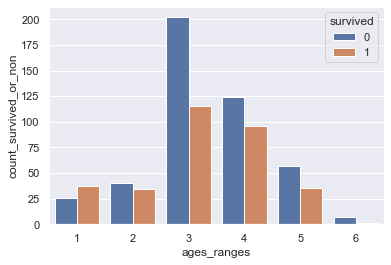

In [100]:
sns.barplot(data=t,x='ages_ranges',y='count_survived_or_non',hue='survived')

In [101]:
t3_0=titanic.groupby(['ages_ranges','survived']).get_group((3,0))
t3_0

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,ages_ranges
0,0,3,male,22.0,1,0,7.2500,S,False,3
5,0,3,male,27.0,0,0,8.4583,Q,True,3
12,0,3,male,20.0,0,0,8.0500,S,True,3
26,0,3,male,27.0,0,0,7.2250,C,True,3
27,0,1,male,19.0,3,2,263.0000,S,False,3
...,...,...,...,...,...,...,...,...,...,...
868,0,3,male,27.0,0,0,9.5000,S,True,3
876,0,3,male,20.0,0,0,9.8458,S,True,3
882,0,3,female,22.0,0,0,10.5167,S,True,3
883,0,2,male,28.0,0,0,10.5000,S,True,3


In [103]:
t3_0.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,ages_ranges
count,202.0,202.000000,202,202.000000,202.000000,202.000000,202.000000,202,202,202.0
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,2,1.0
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,True,3.0
freq,NaN,NaN,168,NaN,NaN,NaN,NaN,152,142,202.0
mean,0.0,2.712871,NaN,24.814356,0.400990,0.193069,20.005051,NaN,NaN,NaN
std,0.0,0.578841,NaN,3.218640,0.983748,0.579373,33.813813,NaN,NaN,NaN
min,0.0,1.000000,NaN,19.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.0,3.000000,NaN,22.000000,0.000000,0.000000,7.775000,NaN,NaN,NaN
50%,0.0,3.000000,NaN,25.000000,0.000000,0.000000,8.687500,NaN,NaN,NaN
75%,0.0,3.000000,NaN,27.000000,1.000000,0.000000,16.037500,NaN,NaN,NaN
